# Joining Data

In [2]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sql-bigquery-341310-10504b2450ab.json"
from bigquery_functions import *

# Create a "Client" object
client = bigquery.Client()

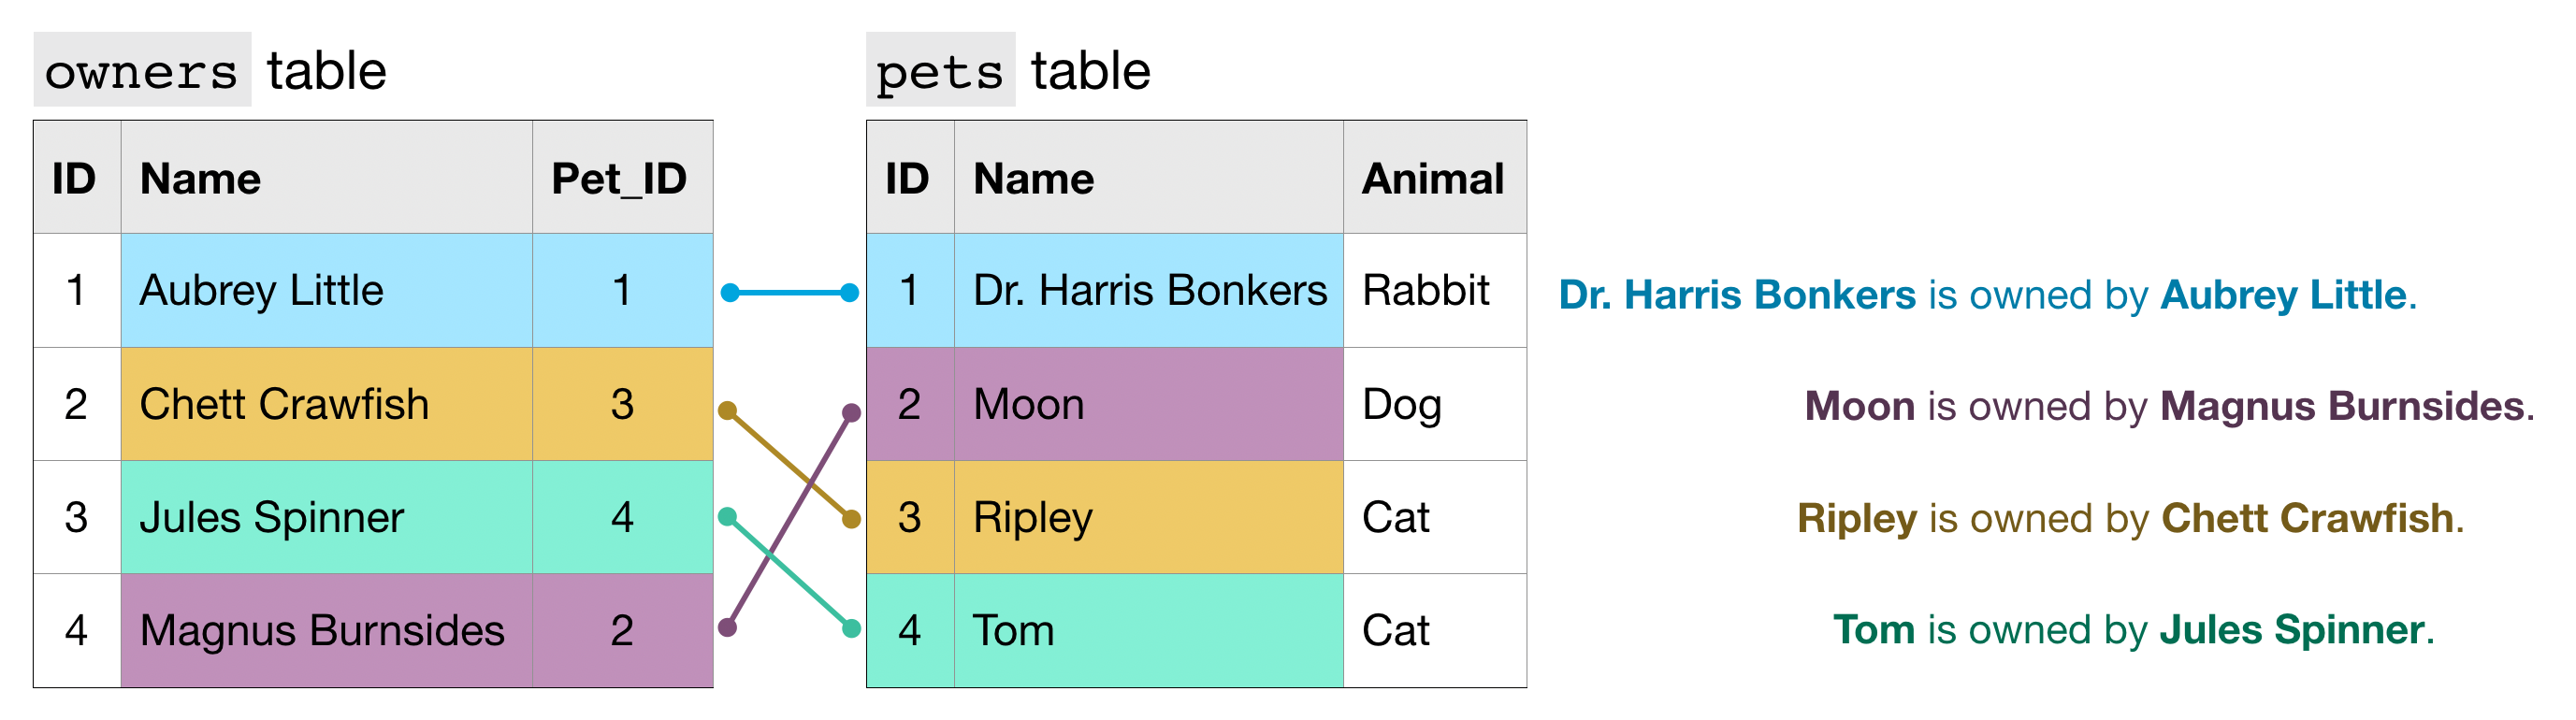

## Inner Join

Using JOIN, we can write a query to create a table with just two columns: the name of the pet and the name of the owner.
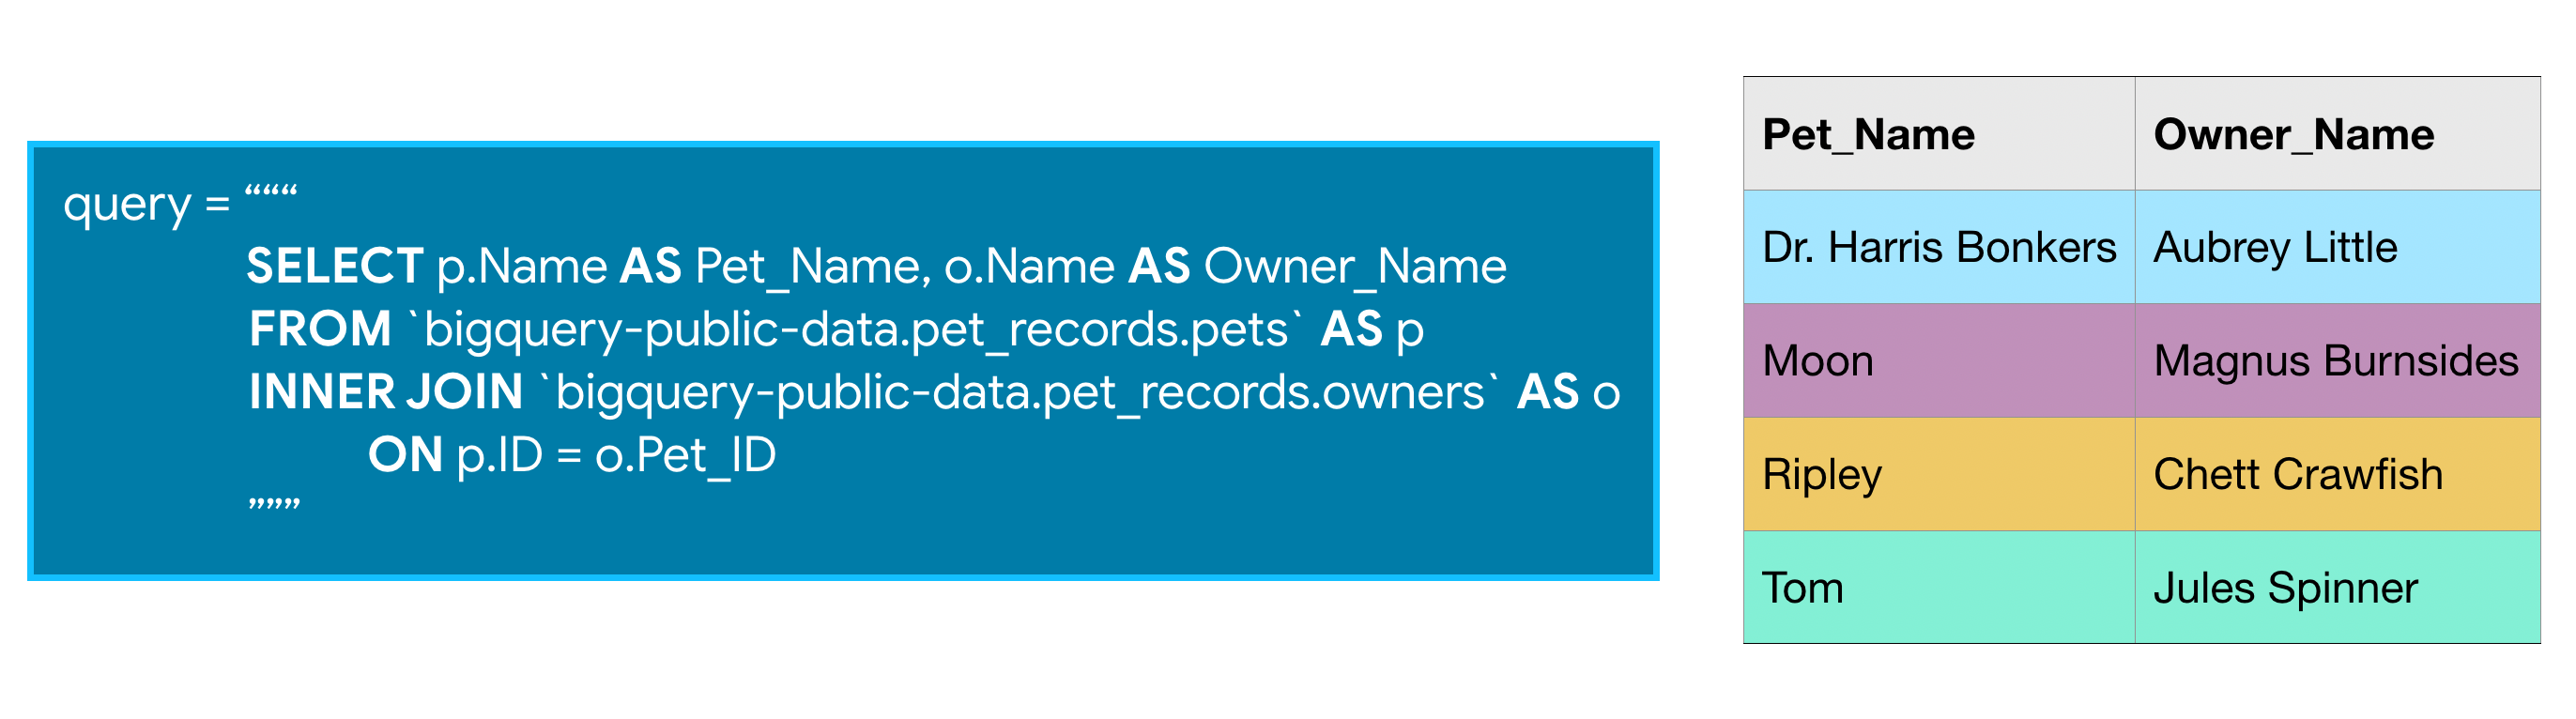

In [3]:
dataset_ref = list_dataset_tables(client, 'github_repos')

commits
contents
files
languages
licenses
sample_commits
sample_contents
sample_files
sample_repos


In [4]:
licenses_table = get_table(client, dataset_ref, 'licenses')
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,PARIKSHITAYAN/logo-works,artistic-2.0
1,AnimalFarmInThaCountry/north-american-octo-bug...,artistic-2.0
2,stephanstan/personalwebspace,artistic-2.0
3,py-amigos/adengine,artistic-2.0
4,scoobster17/joose,artistic-2.0


In [5]:
files_table = get_table(client, dataset_ref, 'sample_files')
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


In [6]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

In [7]:
file_count_by_license = run_query(query, client, 10**10)
file_count_by_license

,license,number_of_files
0,mit,20405417
1,gpl-2.0,16448972
2,apache-2.0,7127287
3,gpl-3.0,4848675
4,bsd-3-clause,3154054
5,agpl-3.0,1324088
6,lgpl-2.1,777012
7,bsd-2-clause,685940
8,lgpl-3.0,567521
9,mpl-2.0,461962


## Other Joins

Replacing INNER JOIN in the query above with LEFT JOIN returns all rows where the two tables have matching entries, along with all of the rows in the left table (whether there is a match or not).

If we instead use a RIGHT JOIN, we get the matching rows, along with all rows in the right table (whether there is a match or not).

Finally, a FULL JOIN returns all rows from both tables. Note that in general, any row that does not have a match in both tables will have NULL entries for the missing values. You can see this in the image below
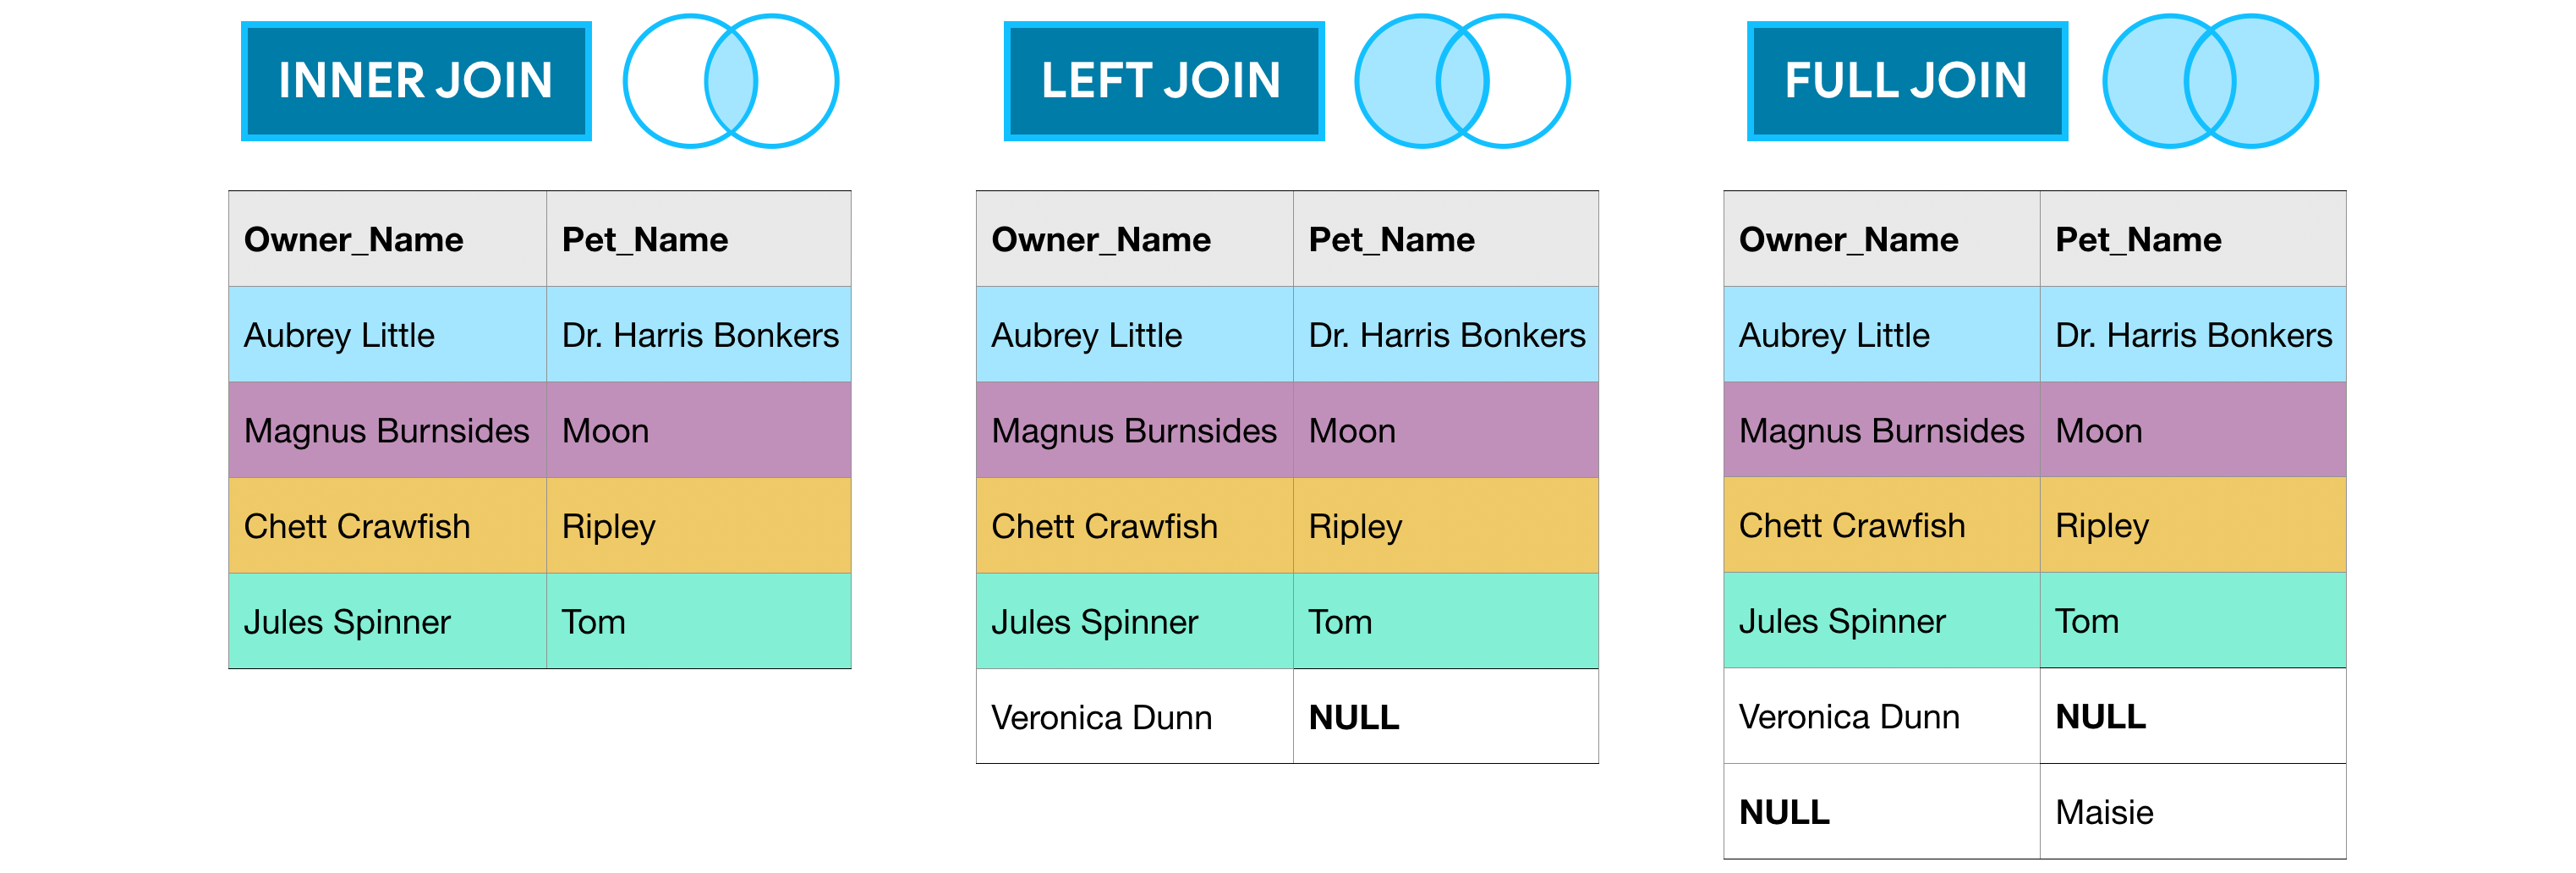

In [8]:
dataset_ref = list_dataset_tables(client, 'hacker_news')

comments
full
full_201510
stories


In [10]:
comments_table = get_table(client, dataset_ref, 'comments')
client.list_rows(comments_table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [11]:
stories_table = get_table(client, dataset_ref, 'stories')
client.list_rows(stories_table, max_results=5).to_dataframe()

,id,by,score,time,time_ts,title,url,text,deleted,dead,descendants,author
0,6940813,sarath237,0,1387536270,2013-12-20 10:44:30+00:00,Sheryl Brindo Hot Pics,http://www.youtube.com/watch?v=ym1cyxneB0Y,Sheryl Brindo Hot Pics,None,True,NaN,sarath237
1,6991401,123123321321,0,1388508751,2013-12-31 16:52:31+00:00,Are you people also put off by the culture of ...,,They&#x27;re pretty explicitly &#x27;startup f...,None,True,NaN,123123321321
2,1531556,ssn,0,1279617234,2010-07-20 09:13:54+00:00,New UI for Google Image Search,http://googlesystem.blogspot.com/2010/07/googl...,Again following on Bing's lead.,None,None,0.0,ssn
3,5012398,hoju,0,1357387877,2013-01-05 12:11:17+00:00,Historic website screenshots,http://webscraping.com/blog/Generate-website-s...,Python script to generate historic screenshots...,None,None,0.0,hoju
4,7214182,kogir,0,1401561740,2014-05-31 18:42:20+00:00,Placeholder,,Mind the gap.,None,None,0.0,kogir


The query below pulls information from the stories and comments tables to create a table showing all stories posted on January 1, 2012, along with the corresponding number of comments. We use a LEFT JOIN so that the results include stories that didn't receive any comments.

In [12]:
# Query to select all stories posted on January 1, 2012, with number of comments
join_query = """
             WITH c AS
             (
             SELECT parent, COUNT(*) as num_comments
             FROM `bigquery-public-data.hacker_news.comments` 
             GROUP BY parent
             )
             SELECT s.id as story_id, s.by, s.title, c.num_comments
             FROM `bigquery-public-data.hacker_news.stories` AS s
             LEFT JOIN c
             ON s.id = c.parent
             WHERE EXTRACT(DATE FROM s.time_ts) = '2012-01-01'
             ORDER BY c.num_comments DESC
             """

In [15]:
join_result = run_query(join_query, client, 10**10)

In [18]:
join_result.head()

,story_id,by,title,num_comments
0,3412900,whoishiring,Ask HN: Who is Hiring? (January 2012),154.0
1,3412901,whoishiring,Ask HN: Freelancer? Seeking freelancer? (Janua...,97.0
2,3412643,jemeshsu,Avoid Apress,30.0
3,3412891,Brajeshwar,"There's no shame in code that is simply ""good ...",27.0
4,3414012,ramanujam,Impress.js - a Prezi like implementation using...,27.0


## Unions

As you've seen, JOINs horizontally combine results from different tables. If you instead would like to vertically concatenate columns, you can do so with a UNION

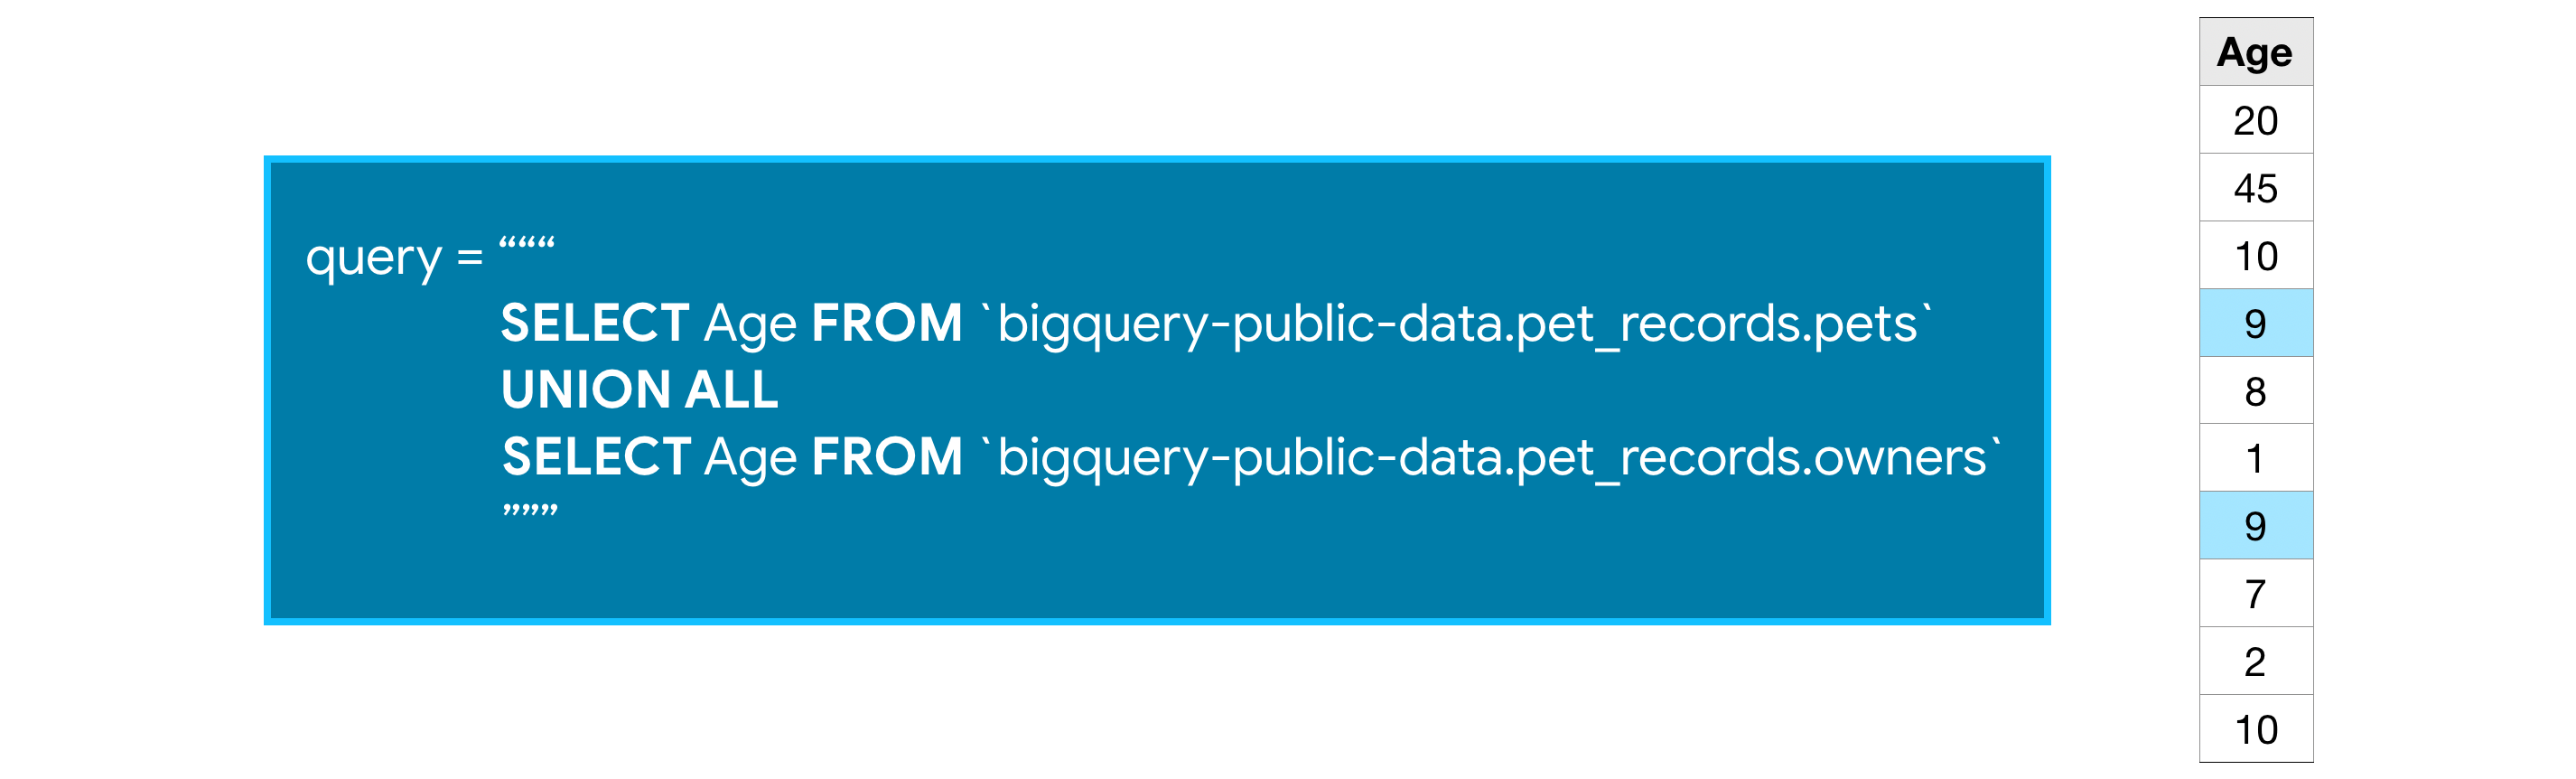

We use UNION ALL to include duplicate values - you'll notice that 9 appears in both the owners table and the pets table, and shows up twice in the concatenated results. If you'd like to drop duplicate values, you need only change UNION ALL in the query to UNION DISTINCT.

In [19]:
# Query to select all users who posted stories or comments on January 1, 2014
union_query = """
              SELECT c.by
              FROM `bigquery-public-data.hacker_news.comments` AS c
              WHERE EXTRACT(DATE FROM c.time_ts) = '2014-01-01'
              UNION DISTINCT
              SELECT s.by
              FROM `bigquery-public-data.hacker_news.stories` AS s
              WHERE EXTRACT(DATE FROM s.time_ts) = '2014-01-01'
              """

In [22]:
union_result = run_query(union_query, client, 10**10)

In [23]:
union_result

,by
0,alenn34
1,projuce
2,alifaizan
3,hackhackhack
4,lelf
...,...
2277,droopybuns
2278,cmircea
2279,obituary_latte
2280,konceptz
